<a href="https://colab.research.google.com/github/Sakhakhini/1/blob/main/INFO5731_Assignment_Three_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [ ]:
import nltk
import pandas as pd 

# load data and combine the text
raw_data = pd.read_csv('raw_reviews.csv')
raw_text = ' '.join(raw_data['review'])
data = nltk.word_tokenize(raw_text)

# create trigrams from the text 
trigrams = nltk.trigrams(data)
# compute frequency of each trigrams
trigrams_freq = nltk.FreqDist(trigrams)

# visualize the trigrams frequency
trigrams_df = pd.DataFrame(trigrams_freq.most_common(), columns=['trigram', 'frequency'])
trigrams_df.head()

,trigram,frequency
0,"(legend, ten, ring)",189
1,"(marvel, cinematic, universe)",65
2,"(best, marvel, movie)",52
3,"(one, best, marvel)",48
4,"(crouching, tiger, hidden)",47


In [ ]:
from typing import List, Tuple 

def compute_bigram_probability(bigram: Tuple[str, str], bigrams: List[Tuple[str, str]], data: List[str]) -> float: 
    # count the number of times a bigram occurs 
    bigram_count = bigrams.count(bigram)
    # count the number of times a word occurs 
    word_count = data.count(bigram[-1])

    return bigram_count / word_count

# create bigrams from the text 
bigrams = list(nltk.bigrams(data))
# compute bigram probability
bigrams_prob = list(map(lambda x: compute_bigram_probability(x, bigrams, data), bigrams))

# visualize the computed probabilities 
bigrams_prob_df = pd.DataFrame(list(zip(bigrams, bigrams_prob)), columns=['bigram', 'probability'])
bigrams_prob_df.head()


,bigram,probability
0,"(big, fan)",0.004032
1,"(fan, many)",0.003650
2,"(many, many)",0.003650
3,"(many, marvel)",0.000551
4,"(marvel, film)",0.000604


In [ ]:
from textblob import TextBlob 
nltk.download('brown')

def compute_relative_probability(review: str, noun_phrase: str, reviews: List[str]) -> float: 
    # compute frequency of the noun phrase in the review 
    noun_phrase_review_freq = review.count(noun_phrase)
    # compute max frequency of the noun phrase in all reviews 
    noun_phrase_max_freq = max(list(map(lambda x: x.count(noun_phrase), reviews)))

    return noun_phrase_review_freq / (noun_phrase_max_freq + 1)

# extract all the noun phrases from the reviews
noun_phrases = TextBlob(" ".join(raw_data['review'])).noun_phrases

# relative probabilites 
relative_probs = []
reviews = raw_data['review']
for review in reviews:
    review_relative_probs = list(map(lambda x: compute_relative_probability(review, x, reviews), noun_phrases))
    relative_probs.append(review_relative_probs)

relative_probs_df = pd.DataFrame(relative_probs, index=reviews, columns=noun_phrases)
relative_probs_df.head()

[nltk_data] Downloading package brown to /home/kinyugo-
[nltk_data]     maina/nltk_data...
[nltk_data]   Package brown is already up-to-date!


,big fan,film reason,overall movie,enjoyable insane eye candy story,plot review film,big screen story,violent frenetic film consequence intimacy humanity movie son,immortal master,tony hope,dad slacker,...,k legend,ring score cast,comic master kung fu,glad right,martial art mind,great tony,true mandarin,great fight scene,comic relief,enjoyable return ben character episode phase movie
review,,,,,,,,,,,,,,,,,,,,,
big fan many many marvel film reason saw one daughter watch overall movie though think enjoyable insane eye candy story could talk plot review film so ill say great would great seen big screen story itself though enjoyable one particularly impacted violent frenetic film consequence intimacy humanity,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
movie son seemingly immortal master ten ring always good see tony hope soaked who wind opposing dad slacker fine lead sister aunt always good see her hope soaked grown increasingly martial art film last couple decade decline movie musical reason why make movie like more try theyre often embarrassing people like unreality people song emotion dance no prefer solid commonplace people floating space kick head me fight choreography dance fight meet fall love challenge dance graceful problem aplenty film there immense amount exposition starting twenty minute sure ben fake mandarin iron man present except certain remnant star power rest still expectation set particularly high good time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
parking valet san the jeff fight bus martial art fighter two travel china reunite sister six year raised assassin make long story short opening sequence come play save done graphic special effect character right blend humor fell love voice reason comedy afraid going emma stone death love marvel done past getting figure must see,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
that vision film along line snake eye date bagel four course paced energetic relentless particularly genre normally go to enjoy every second it visual masterpiece superb acting terrific music produced magical way plan seeing again understand bit little watch it love it,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
course off teasing making fun certain thing summary line though truth especially consider last third movie quite fantastical pun much here may seen bus scene already i imagine many time still quite highlight work wonder even revealed plot character able watch screen let tell wow also wow much respect marvel anyone involved make first ten minute throwing lot term slang well throughout give touch authenticity immigrant anywhere else world grew up also nice prone sarcastic really think good thing major big representation especially nowadays rising people blaming china people china virus movie topic entertainment all every interview actor involved something good good u bit come get pure theatrical release instead black widow treatment which also available plus cinema time issue come that watch big screen waiting stuff drop especially mid credit scene tease credit scene might also hint something bigger tease midway credit actually almost beginning back movie really funny character quite familiar face previous entry also cinema well done,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# import libraries
import re
import string

from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# instantiate lemmatizer
lemmatizer = WordNetLemmatizer()
# instantiate a list of english words
english_words = words.words()
# buid TF-Idf matrix 
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(raw_data['review'])

def clean_text(text: str) -> str:
    # transform text to lowercase
    text = text.lower()
    # transform text into ascii and remove extra whitespace
    text_ascii = text.encode(encoding="ascii", errors="ignore").decode()
    text = " ".join([word for word in text_ascii.split()])
    # remove stopwords
    text = " ".join([
        word for word in text.split() if word not in stopwords.words("english")
    ])
    # remove urls
    text = re.sub(r"https?:\/\/.*[\r\n]*", "", text)
    # remove numbers
    text = re.sub(r"[0-9]+", "", text)
    # remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # lemmatize words
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    # remove non english words
    text = " ".join([word for word in text if word in english_words])

    return text

def query(reviews: pd.DataFrame, query: str) -> pd.DataFrame:
    # clean the query
    clean_query = clean_text(query)
    # vectorize the query
    vec_query = vectorizer.transform([clean_query])

    # compute similarity 
    similarity_results = cosine_similarity(X, vec_query)
    # sort reviews by their similarites 
    review_similarites = zip(reviews, similarity_results)
    review_similarites = sorted(review_similarites, key=lambda x: x[1], reverse=True)

    return review_similarites

review_similarities_df = pd.DataFrame(query(raw_data['review'], 'I love the movie'), columns=['review', 'score'])
review_similarities_df.head()


,review,score
0,really movie story good fight effect also love...,[0.46555541809386225]
1,absolutely film fabulous start finish cant wai...,[0.462820661400752]
2,love story good also fighting watch,[0.45979256346857167]
3,movie good best superhero movie marvel fan wat...,[0.4366459599663438]
4,best marvel movie since great new addition lov...,[0.4249834564033631]


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kinyugo-maina/miniconda3/envs/datascience/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


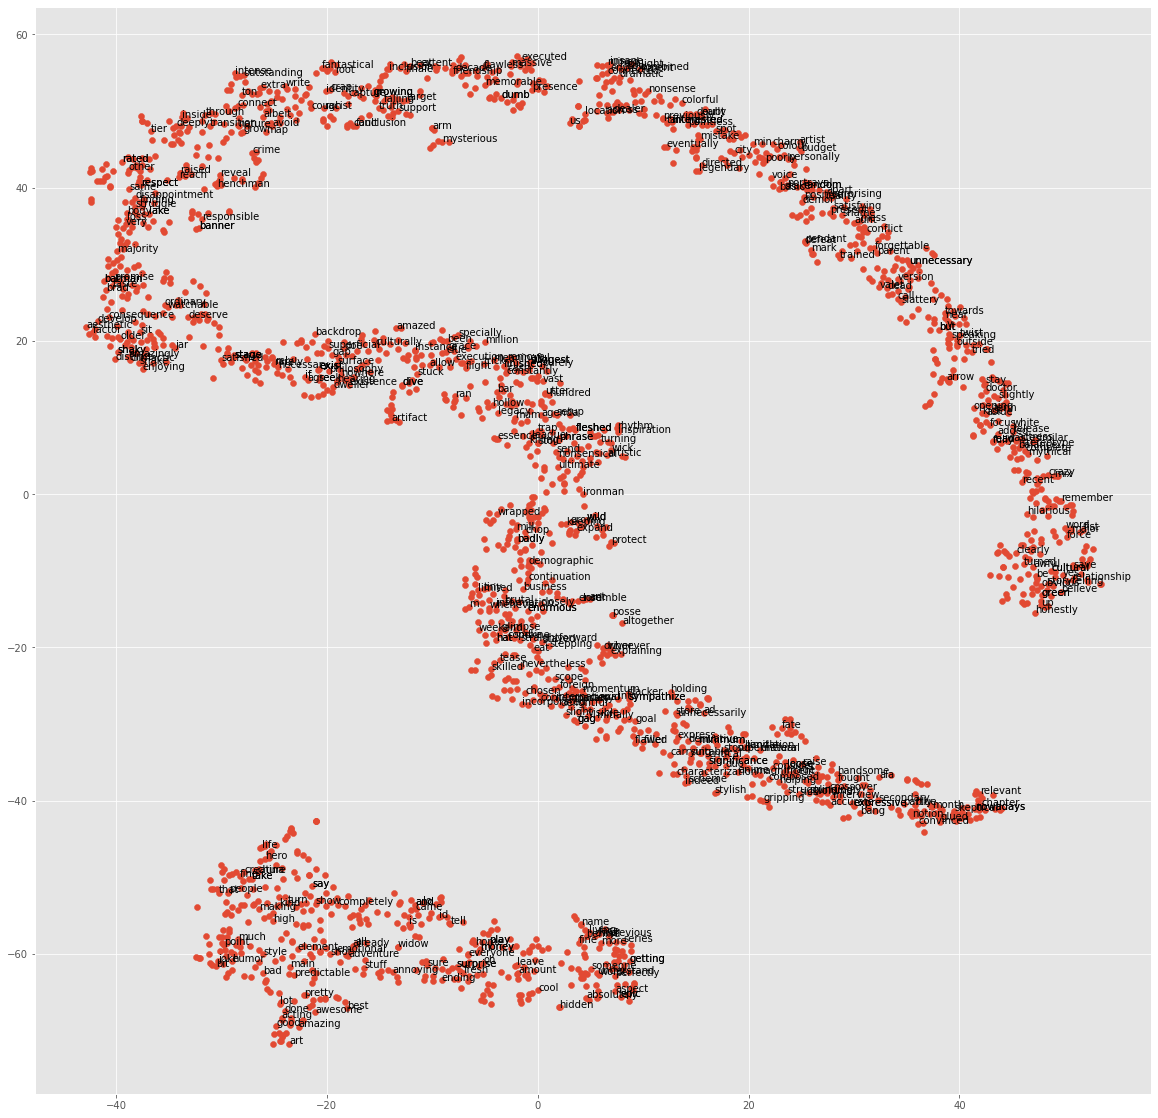

In [ ]:
# import packages
import numpy as np 
import matplotlib.pyplot as plt 
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

plt.style.use("ggplot")

def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_matplotlib(x_vals, y_vals, labels):
    plt.figure(figsize=(20, 20))
    plt.scatter(x_vals, y_vals)

    indices = list(range(len(labels)))
    for i in np.random.choice(indices, size=500):
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

# split reviews into words
sentences = raw_data['review'].apply(lambda x: nltk.word_tokenize(x))
# create a word to vec model 
w2v_model = Word2Vec(sentences, vector_size=300)

# get the first 2 principal components of the vectors
x_vals, y_vals, labels = reduce_dimensions(w2v_model)

# visualize the principal components 
plot_with_matplotlib(x_vals, y_vals, labels)

plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link: 



